In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder





In [63]:
df=pd.read_csv("heart_disease_data_with_features.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782


In [64]:
df.info()
#Let's get information about our data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    int64  
 1   sex                    303 non-null    int64  
 2   cp                     303 non-null    int64  
 3   trestbps               303 non-null    int64  
 4   chol                   303 non-null    int64  
 5   fbs                    303 non-null    int64  
 6   restecg                303 non-null    int64  
 7   thalach                303 non-null    int64  
 8   exang                  303 non-null    int64  
 9   oldpeak                303 non-null    float64
 10  slope                  303 non-null    int64  
 11  ca                     299 non-null    float64
 12  thal                   301 non-null    float64
 13  num                    303 non-null    int64  
 14  age_group              302 non-null    object 
 15  choles

In [65]:
#Let's examine our categorical column
df["age_group"].value_counts()

age_group
50s    125
60s     81
40s     72
30s     14
70s     10
Name: count, dtype: int64

In [66]:
df["cholesterol_level"].value_counts()

cholesterol_level
high      152
normal    101
low        49
Name: count, dtype: int64

In [67]:
df["bp_level"].value_counts()

bp_level
normal    140
low        95
high       66
Name: count, dtype: int64

In [68]:
#Let's use labelencoder to convert these to numeric data.
le = LabelEncoder()
df['bp_level'] = le.fit_transform(df['bp_level'])
df['cholesterol_level'] = le.fit_transform(df['cholesterol_level'])
df['age_group'] = le.fit_transform(df['age_group'])


In [69]:
df["bp_level"].value_counts()

bp_level
2    140
1     95
0     66
3      2
Name: count, dtype: int64

In [70]:
#Let's check our null values
print(df.isnull().sum().sort_values(ascending=False))



ca                       4
risk_factor              2
thal                     2
symptom_severity_diff    1
avg_chol_by_age_group    1
age                      0
age_squared              0
chol_squared             0
age_thalach_ratio        0
missing_values           0
log_thalach_chol         0
chol_trestbps_ratio      0
log_chol                 0
symptom_zscore           0
thalach_chol_diff        0
age_chol_effect          0
thalach_risk_effect      0
age_trestbps_effect      0
log_trestbps             0
symptom_severity         0
sex                      0
risk_score               0
bp_level                 0
cholesterol_level        0
age_group                0
num                      0
slope                    0
oldpeak                  0
exang                    0
thalach                  0
restecg                  0
fbs                      0
chol                     0
trestbps                 0
cp                       0
chol_risk_ratio          0
dtype: int64


In [71]:
df.dropna(inplace=True)
#Let's drop our null values ​​from the data frame

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 301
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    296 non-null    int64  
 1   sex                    296 non-null    int64  
 2   cp                     296 non-null    int64  
 3   trestbps               296 non-null    int64  
 4   chol                   296 non-null    int64  
 5   fbs                    296 non-null    int64  
 6   restecg                296 non-null    int64  
 7   thalach                296 non-null    int64  
 8   exang                  296 non-null    int64  
 9   oldpeak                296 non-null    float64
 10  slope                  296 non-null    int64  
 11  ca                     296 non-null    float64
 12  thal                   296 non-null    float64
 13  num                    296 non-null    int64  
 14  age_group              296 non-null    int64  
 15  cholesterol

In [73]:
#Let's do a drop operation in similar columns, for example age group, age, age squared
#We will deal with extra cases in this area later
#Let's also delete our missing values ​​data.
#Definition of missing_values: Count of missing values in 'ca' and 'thal'.

In [74]:
df = df.drop(['age_group', 'age_squared','missing_values'], axis=1)

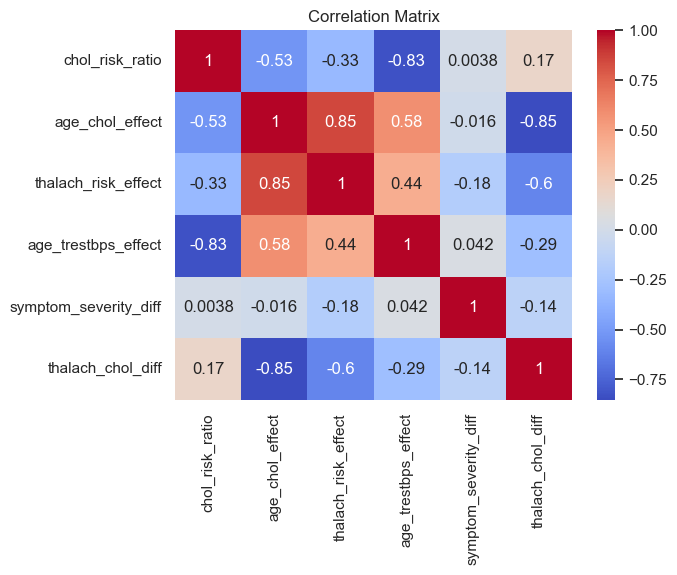

In [75]:
#Let's start examining our columns by visualizing them
corr = df[['chol_risk_ratio', 'age_chol_effect', 'thalach_risk_effect', 'age_trestbps_effect','symptom_severity_diff','thalach_chol_diff']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
%matplotlib inline

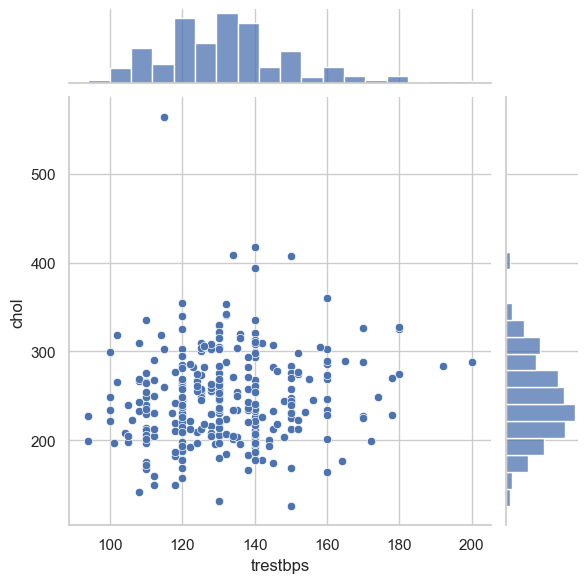

In [76]:
sns.jointplot(x='trestbps',y ='chol', data = df)
%matplotlib inline
#chol: Serum cholesterol level (mg/dl) (int).
#trestbps: Resting blood pressure (mm Hg) (int).

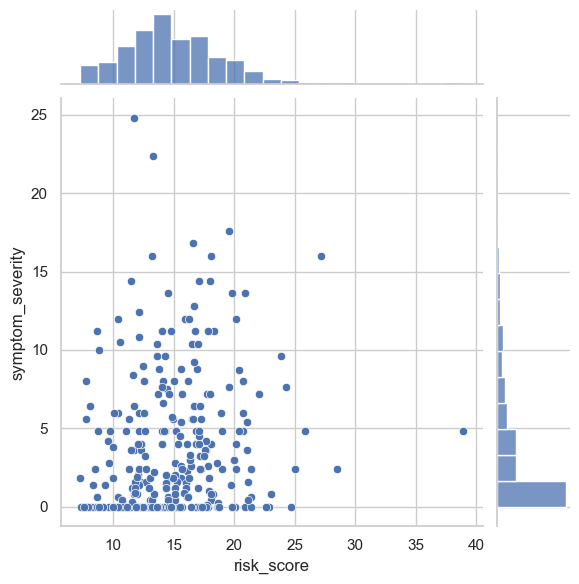

In [77]:
sns.jointplot(x='risk_score',y ='symptom_severity', data = df)
%matplotlib inline
#risk_score: Calculated risk score using the formula: (\text{age} \times \text{chol} / 1000 + \text{trestbps} / 100).
#symptom_severity: Severity of symptoms; calculated as (\text{cp} \times \text{oldpeak}).

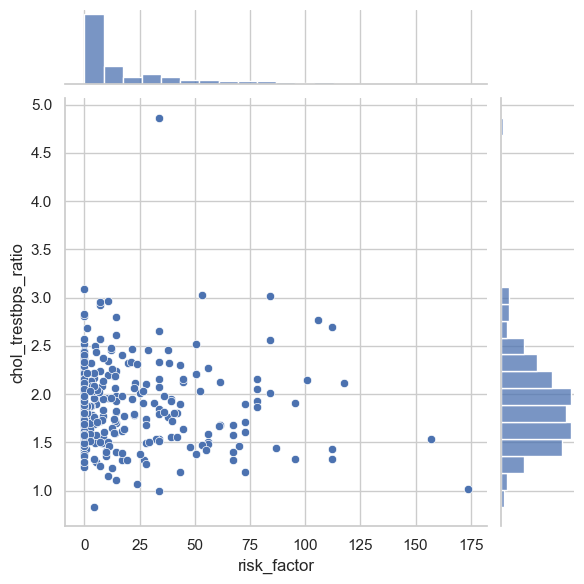

In [78]:
sns.jointplot(x='risk_factor',y ='chol_trestbps_ratio', data = df)
%matplotlib inline

#risk_factor: Risk factor calculated as (\text{cp} \times \text{oldpeak} \times \text{thal}).
#chol_trestbps_ratio: Ratio of cholesterol level to resting blood pressure.

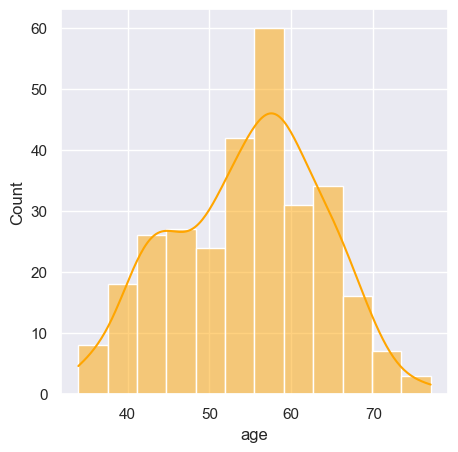

In [79]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1,1, figsize=(5, 5))

sns.histplot(data=df, x="age", kde=True, color='orange')
%matplotlib inline

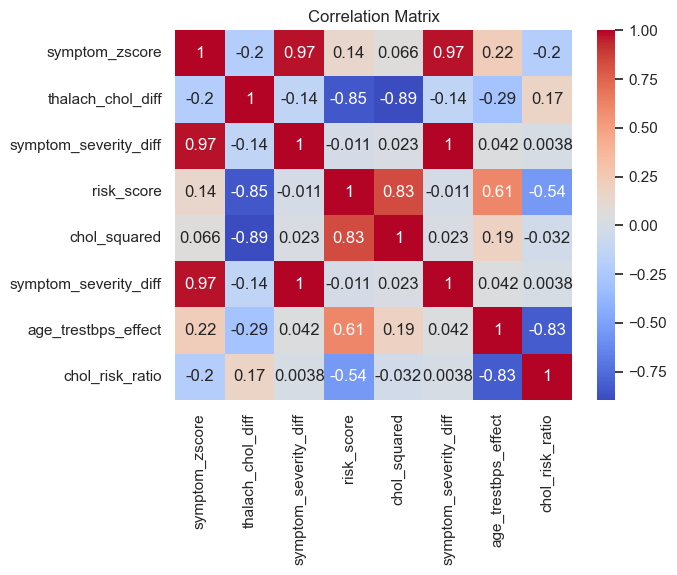

In [80]:
corr = df[['symptom_zscore', 'thalach_chol_diff', 'symptom_severity_diff', 'risk_score','chol_squared','symptom_severity_diff','age_trestbps_effect','chol_risk_ratio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
%matplotlib inline
plt.show()
#symptom_zscore: Z-score of symptom severity.
#thalach_chol_diff: Difference between maximum heart rate and cholesterol level.
#symptom_severity_diff: Difference in symptom severity compared to the average for the age group.
#risk_score: Calculated risk score using the formula: (\text{age} \times \text{chol} / 1000 + \text{trestbps} / 100).
#chol_squared: Square of cholesterol level.
#symptom_severity_diff: Difference in symptom severity compared to the average for the age group.
#age_trestbps_effect: Product of age and resting blood pressure.
#chol_risk_ratio: Ratio of cholesterol level to risk score.

In [81]:
df.nunique()

age                       40
sex                        2
cp                         4
trestbps                  50
chol                     152
fbs                        2
restecg                    3
thalach                   90
exang                      2
oldpeak                   40
slope                      3
ca                         4
thal                       3
num                        5
cholesterol_level          4
bp_level                   4
risk_score               291
symptom_severity          70
log_chol                 152
log_trestbps              50
chol_squared             152
age_thalach_ratio        279
risk_factor               99
chol_trestbps_ratio      280
log_thalach_chol         290
symptom_zscore            68
avg_chol_by_age_group      5
thalach_chol_diff        160
symptom_severity_diff    125
age_chol_effect          290
thalach_risk_effect      296
age_trestbps_effect      220
chol_risk_ratio          296
dtype: int64

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.628378,8.941831,34.000000,48.000000,56.000000,61.000000,77.000000
sex,296.0,0.675676,0.468915,0.000000,0.000000,1.000000,1.000000,1.000000
cp,296.0,3.162162,0.964130,1.000000,3.000000,3.000000,4.000000,4.000000
trestbps,296.0,131.699324,17.792613,94.000000,120.000000,130.000000,140.000000,200.000000
chol,296.0,247.496622,52.024245,126.000000,211.750000,243.000000,276.250000,564.000000
fbs,296.0,0.145270,0.352970,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,296.0,0.993243,0.994879,0.000000,0.000000,1.000000,2.000000,2.000000
thalach,296.0,149.422297,22.776304,71.000000,133.000000,152.500000,165.250000,195.000000
exang,296.0,0.327703,0.470171,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,296.0,1.059122,1.166474,0.000000,0.000000,0.800000,1.650000,6.200000


In [83]:
mean_stats = df.groupby('risk_score').mean()
mean_stats.to_csv("stats-by-risk.csv")
#Let's see the risk_score with other variables

In [84]:
df.groupby('risk_score').agg(['mean']).T

,risk_score,7.284,7.368,7.637,7.780,7.785,7.940,8.130,8.152,8.320,8.481,...,22.840,23.042,23.840,24.244,24.658,25.000,25.828,27.141,28.505,38.938
age,mean,44.000000,34.000000,41.000000,40.000000,35.000000,35.000000,35.000000,41.000000,39.500000,49.000000,...,64.000000,71.000000,70.000000,56.000000,77.000000,65.000000,62.000000,63.000000,65.000000,67.000000
sex,mean,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cp,mean,3.000000,1.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,2.000000,3.000000,...,3.000000,2.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000
trestbps,mean,108.000000,118.000000,120.000000,110.000000,138.000000,122.000000,120.000000,110.000000,115.000000,118.000000,...,140.000000,160.000000,130.000000,134.000000,125.000000,160.000000,140.000000,150.000000,140.000000,115.000000
chol,mean,141.000000,182.000000,157.000000,167.000000,183.000000,192.000000,198.000000,172.000000,185.000000,149.000000,...,335.000000,302.000000,322.000000,409.000000,304.000000,360.000000,394.000000,407.000000,417.000000,564.000000
fbs,mean,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
restecg,mean,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,...,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
thalach,mean,175.000000,174.000000,182.000000,114.000000,182.000000,174.000000,130.000000,158.000000,165.000000,126.000000,...,158.000000,162.000000,109.000000,150.000000,162.000000,151.000000,157.000000,154.000000,157.000000,160.000000
exang,mean,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
oldpeak,mean,0.600000,0.000000,0.000000,2.000000,1.400000,0.000000,1.600000,0.000000,0.350000,0.800000,...,0.000000,0.400000,2.400000,1.900000,0.000000,0.800000,1.200000,4.000000,0.800000,1.600000


In [85]:
#Let's take our data with categorical features into this group.
categorical_features = ['sex', 'cp', 'fbs', 'restecg',
'exang', 'slope', 'ca', 'thal', 'num',
'cholesterol_level', 'bp_level', 'avg_chol_by_age_group']

In [86]:
numeric_features = [col for col in df.columns if col not in categorical_features]

In [87]:
print(f"Numeric Features: {len(numeric_features)}")

print(f"Categorical Features: {len(categorical_features)}")

Numeric Features: 21
Categorical Features: 12


In [88]:
def countplot(col):
    plt.figure(figsize=(6, 5))
    sns.set_style("whitegrid")
    sns.countplot(data=df,
                x=col,
                palette='bright',
                width=0.5)
    plt.title(f"{col}'s Countplot",
              fontsize=14,
              weight="bold")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.show()

#Let's define a function to visualize

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


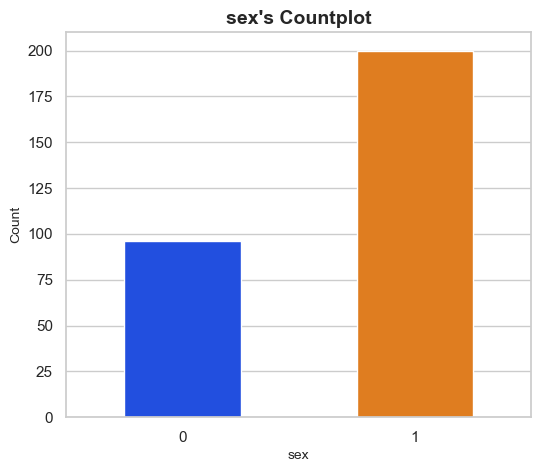

In [89]:
countplot("sex")


/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


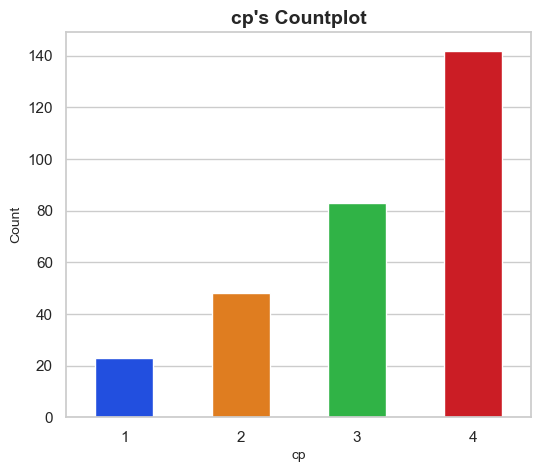

In [90]:
countplot("cp")

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


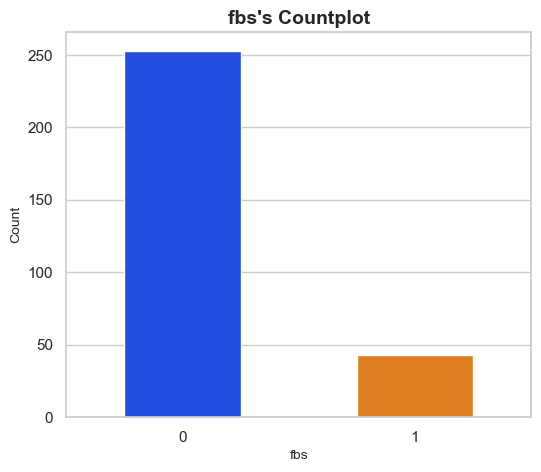

In [91]:
countplot("fbs")

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


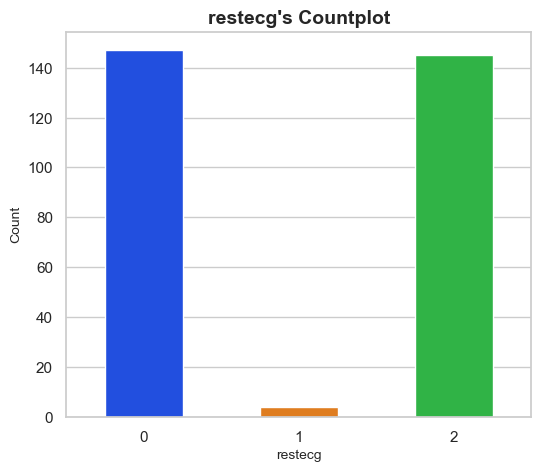

In [92]:
countplot("restecg")

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


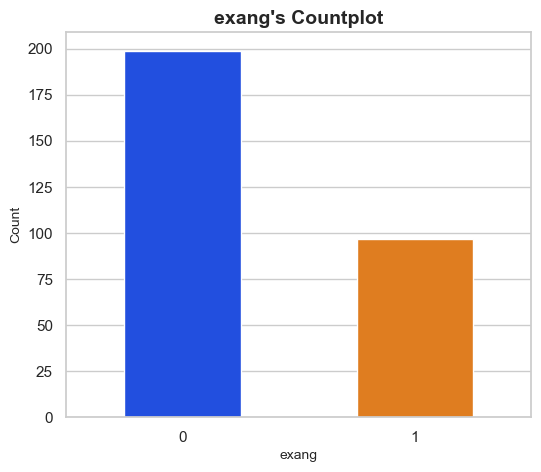

In [93]:
countplot("exang")

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


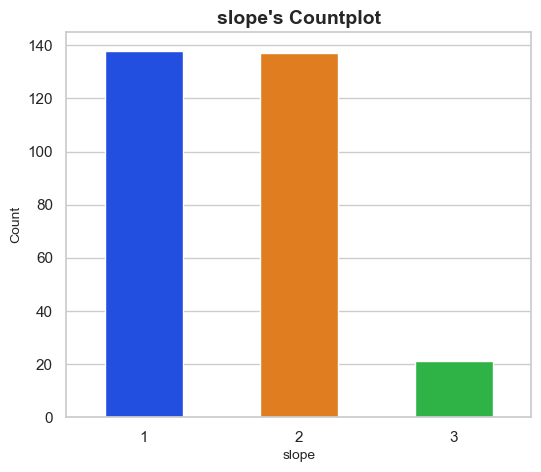

In [94]:
countplot("slope")

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


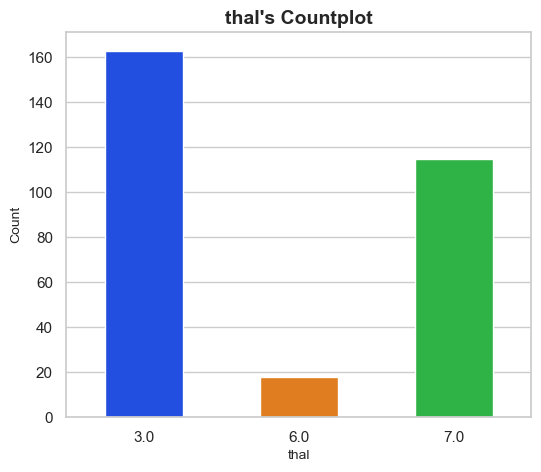

In [95]:
countplot("thal")

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


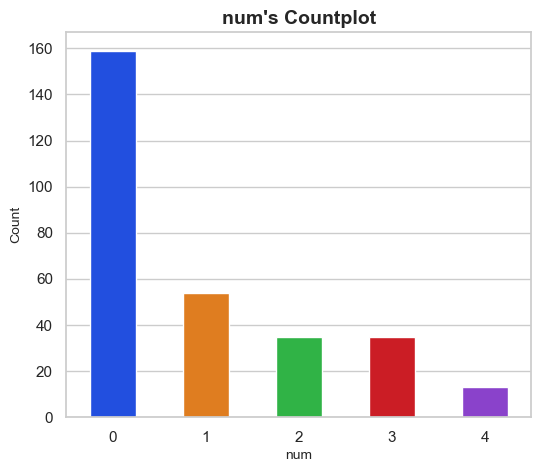

In [96]:
countplot("num")

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


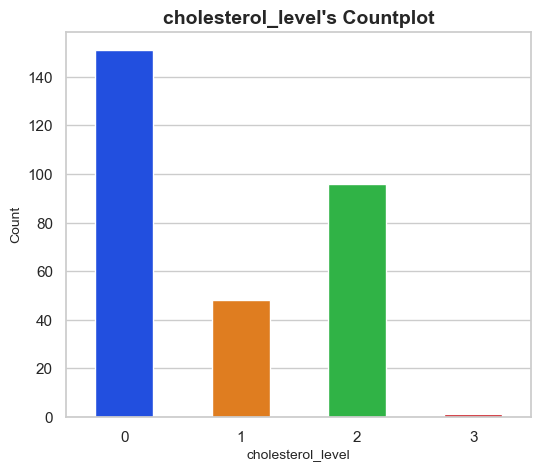

In [97]:
countplot("cholesterol_level")

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


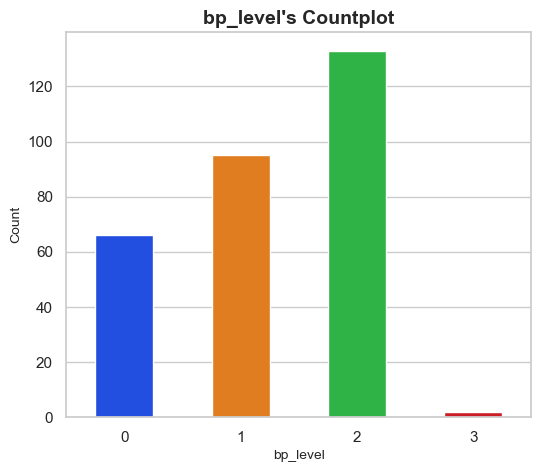

In [98]:
countplot("bp_level")

/var/folders/q3/1c91cqz52t9f43nvh74rn2zr0000gn/T/ipykernel_4256/2525831005.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


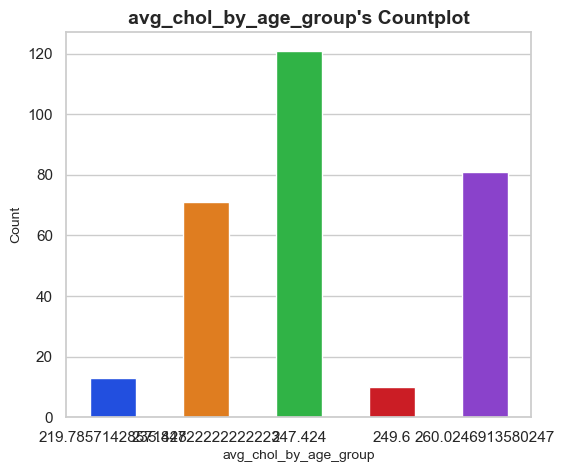

In [99]:
countplot("avg_chol_by_age_group")

In [100]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,chol_trestbps_ratio,log_thalach_chol,symptom_zscore,avg_chol_by_age_group,thalach_chol_diff,symptom_severity_diff,age_chol_effect,thalach_risk_effect,age_trestbps_effect,chol_risk_ratio
0,63,1,1,145,233,1,2,150,0,2.3,...,1.595890,0.919704,-0.275764,260.024691,-83,-2.532099,14679,2419.350,9135,13.602662
1,67,1,4,160,286,0,2,108,1,1.5,...,1.776398,0.828936,0.568702,260.024691,-178,1.167901,19162,2242.296,10720,13.142174
2,67,1,4,120,229,0,2,129,1,2.6,...,1.892562,0.895083,1.572932,260.024691,-100,5.567901,15343,2134.047,8040,13.053640
3,37,1,3,130,250,0,0,187,0,3.5,...,1.908397,0.947695,1.595755,219.785714,-63,8.178571,9250,1972.850,4810,21.645022
4,41,0,2,130,204,0,2,172,0,1.4,...,1.557252,0.968116,-0.161647,235.847222,-32,0.783333,8364,1662.208,5330,19.129782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,...,1.709220,0.878181,-0.618115,247.424000,-118,-2.834400,13737,1861.851,7980,14.934622
298,45,1,1,110,264,0,0,132,0,1.2,...,2.378378,0.876449,-0.526822,235.847222,-132,-0.816667,11880,1713.360,4950,18.884120
299,68,1,4,144,193,1,0,141,0,3.4,...,1.331034,0.940767,2.303281,260.024691,-52,8.767901,13124,2053.524,9792,12.400411
300,57,1,4,130,131,0,0,115,1,1.2,...,1.000000,0.973537,0.294821,247.424000,-16,1.165600,7467,1008.205,7410,13.412512


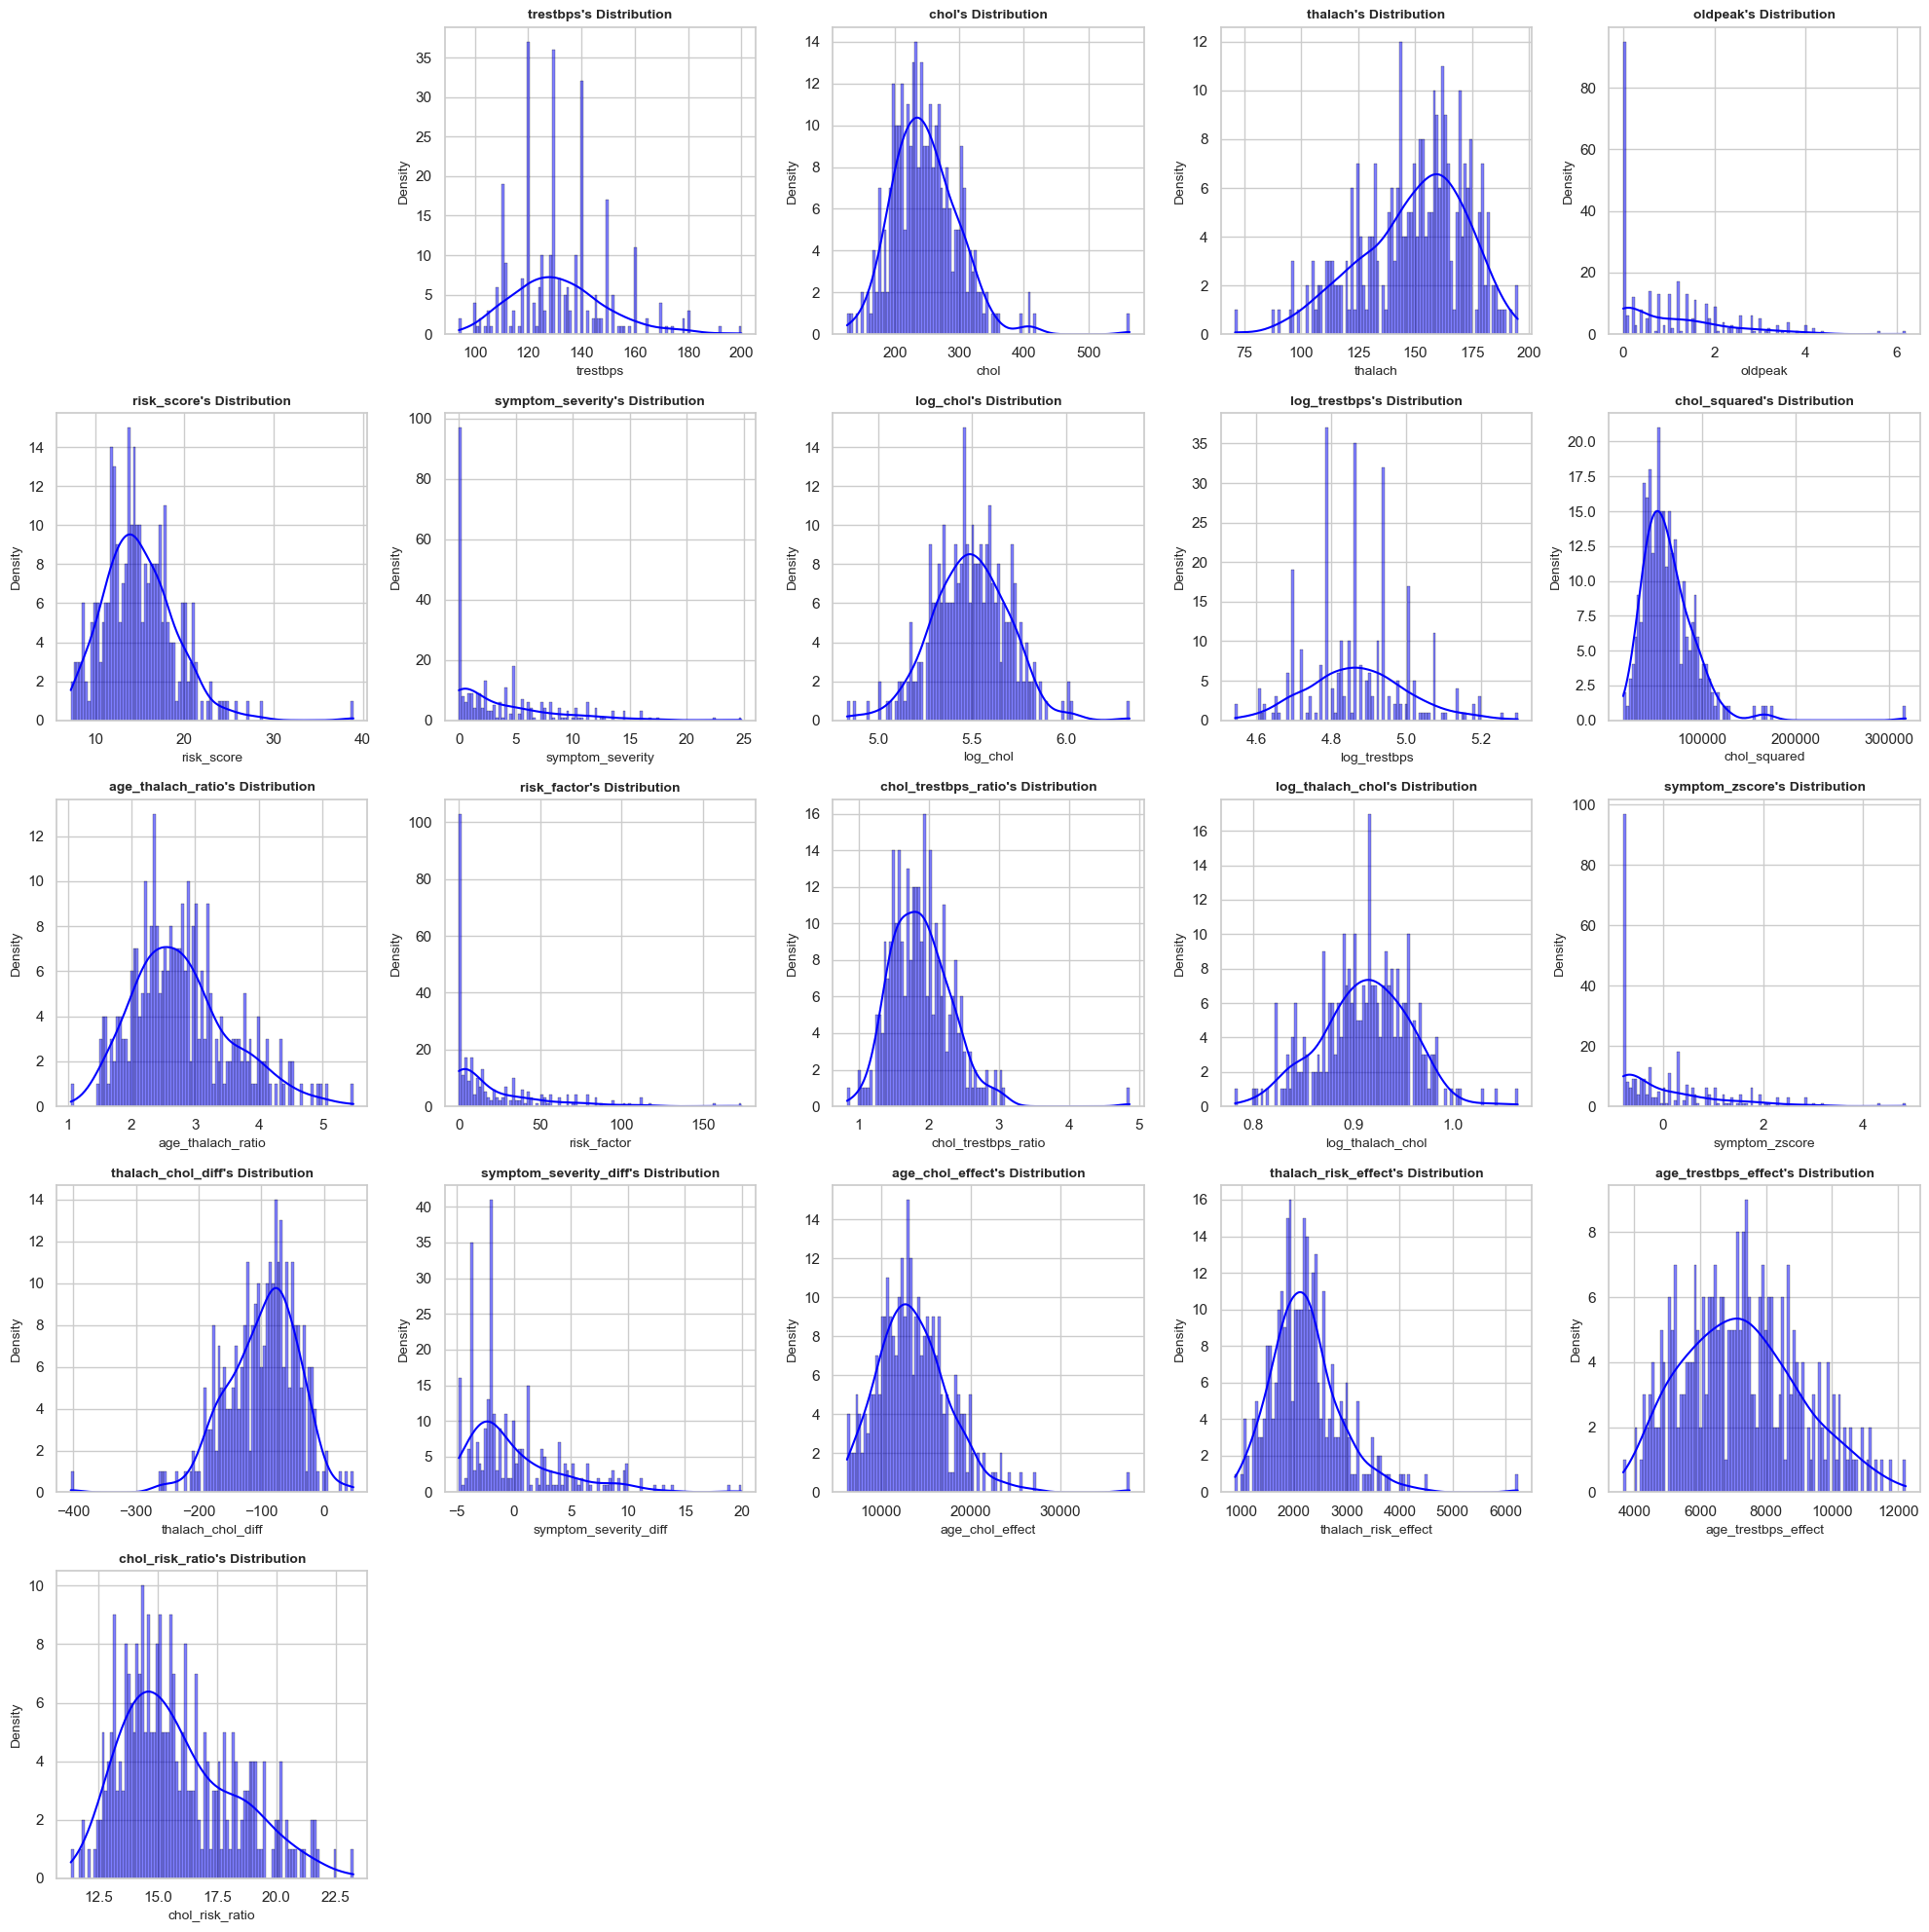

In [101]:
plt.figure(figsize=(20, 20))
sns.set_style('whitegrid')
for i, var in enumerate(numeric_features[1:], 1):
    plt.subplot(5,5,i+1)
    sns.histplot(df[var],
                 bins=100,
                 kde=True,
                 color='blue',
                 edgecolor='black')
    plt.title(f"{var}'s Distribution",
              fontsize=10,
              weight="bold")
    plt.xlabel(var, fontsize=10)
    plt.ylabel("Density", fontsize=10)
plt.tight_layout()
plt.show()
%matplotlib inline
#Let's visualize our numerical data


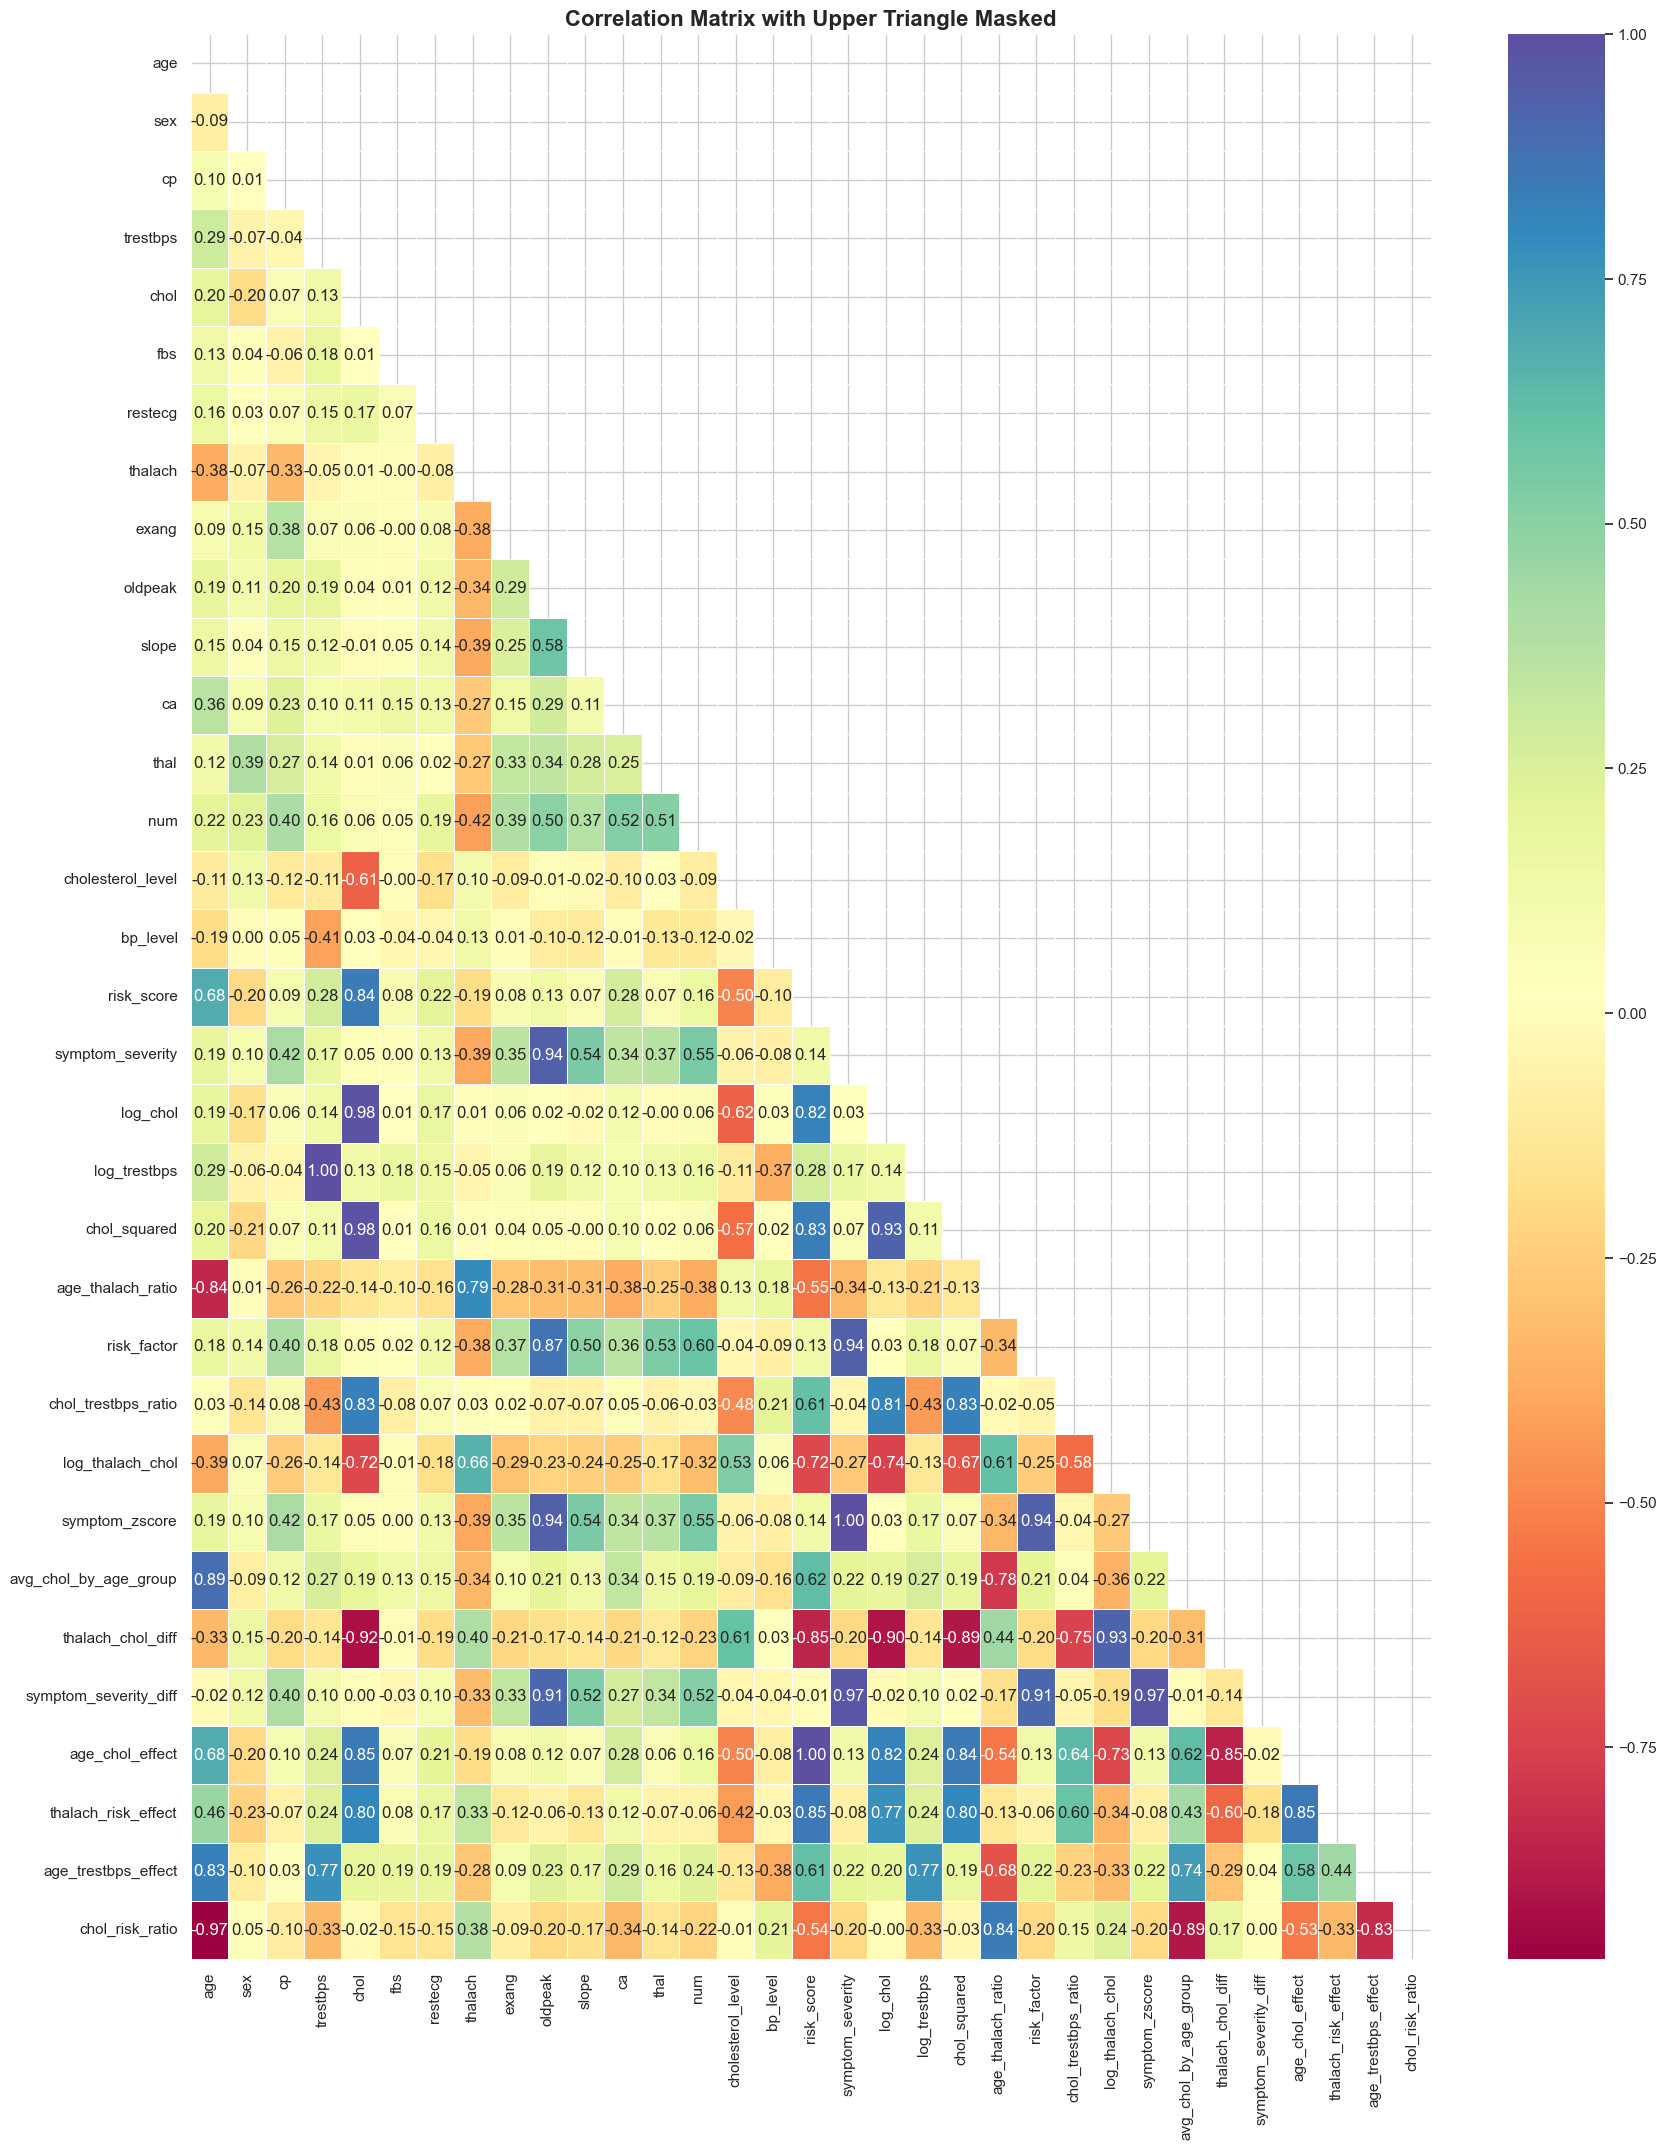

In [102]:
#We created a larger heat map
corr_matrix = df.corr()
#For have a clearer view
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 25))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="Spectral", linewidths=0.5)
plt.title("Correlation Matrix with Upper Triangle Masked", fontsize=16, weight='bold')
plt.show()
%matplotlib inline


In [103]:
df.nunique()
#Let's look at our unique values ​​in the columns

age                       40
sex                        2
cp                         4
trestbps                  50
chol                     152
fbs                        2
restecg                    3
thalach                   90
exang                      2
oldpeak                   40
slope                      3
ca                         4
thal                       3
num                        5
cholesterol_level          4
bp_level                   4
risk_score               291
symptom_severity          70
log_chol                 152
log_trestbps              50
chol_squared             152
age_thalach_ratio        279
risk_factor               99
chol_trestbps_ratio      280
log_thalach_chol         290
symptom_zscore            68
avg_chol_by_age_group      5
thalach_chol_diff        160
symptom_severity_diff    125
age_chol_effect          290
thalach_risk_effect      296
age_trestbps_effect      220
chol_risk_ratio          296
dtype: int64

In [104]:

df["log_chol"].value_counts()
#log_chol: Logarithm of cholesterol level.
#log_trestbps: Logarithm of resting blood pressure.
#age_squared: Square of age.
#chol_squared: Square of cholesterol level.
#log_thalach_chol: Logarithm of the product of maximum heart rate and cholesterol level.

log_chol
5.283204    6
5.455321    6
5.594711    5
5.356586    5
5.537334    5
           ..
5.117994    1
5.509388    1
5.828946    1
5.075174    1
4.875197    1
Name: count, Length: 152, dtype: int64

In [105]:
df["log_thalach_chol"].value_counts()

log_thalach_chol
0.901344    2
0.933667    2
0.912159    2
0.968116    2
0.915096    2
           ..
0.942747    1
0.881405    1
0.983011    1
0.922620    1
0.944537    1
Name: count, Length: 290, dtype: int64

In [106]:
#Let's drop the columns that have similar features to another column we detected.
df = df.drop(['chol_squared', 'log_trestbps','log_chol'], axis=1)

In [107]:
df.nunique()

age                       40
sex                        2
cp                         4
trestbps                  50
chol                     152
fbs                        2
restecg                    3
thalach                   90
exang                      2
oldpeak                   40
slope                      3
ca                         4
thal                       3
num                        5
cholesterol_level          4
bp_level                   4
risk_score               291
symptom_severity          70
age_thalach_ratio        279
risk_factor               99
chol_trestbps_ratio      280
log_thalach_chol         290
symptom_zscore            68
avg_chol_by_age_group      5
thalach_chol_diff        160
symptom_severity_diff    125
age_chol_effect          290
thalach_risk_effect      296
age_trestbps_effect      220
chol_risk_ratio          296
dtype: int64

In [108]:
#we will scale data 
#we will use pipeline 
#We will use our training model separately for three values

In [109]:

y = df.num
X = df.drop('num', axis=1)
#num: Heart disease diagnosis (int); 0: No disease, 1-4: Disease present with increasing severity.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)



In [111]:
#Let's create a logistics pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
('pca1',PCA(n_components=2)),
('lr_classifier',LogisticRegression())])
#Let's create a Decision Tree pipeline
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
('pca2',PCA(n_components=2)),
('dt_classifier',DecisionTreeClassifier(random_state=0))])
#Let's create a RandomForest pipeline
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                                ('pca3',PCA(n_components=2)),
                                ('rf_classifier',RandomForestClassifier(random_state=0))])

In [112]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]
#Let's create variables for accuracy and best model
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [113]:
#Let's set what kind of result we want to print
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

#Let's loop the pipelines we saved as pipelines
#Let's make fit for x_train and y_train

for pipe in pipelines:
    pipe.fit(X_train, y_train)


    
  


In [114]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))
    
#Let's look at the results of our models

Logistic Regression Test Accuracy: 0.6
Decision Tree Test Accuracy: 0.4666666666666667
RandomForest Test Accuracy: 0.5666666666666667


In [115]:
#Let's print the classifier with best accuracy
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
        print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))
        

Classifier with best accuracy:Logistic Regression


In [116]:
#Let's do the same for our other columns
y_thal = df.thal
X_thal = df.drop('thal', axis=1)
#thal: Thalassemia; 3: Normal, 6: Fixed defect, 7: Reversible defect (float).


In [117]:
X_train_thal, X_test_thal, y_train_thal, y_test_thal = train_test_split(X_thal, y_thal, test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)


In [118]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

for pipe in pipelines:
    pipe.fit(X_train_thal, y_train_thal)

In [119]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test_thal,y_test_thal)))

Logistic Regression Test Accuracy: 0.6333333333333333
Decision Tree Test Accuracy: 0.6333333333333333
RandomForest Test Accuracy: 0.65


In [120]:

for i,model in enumerate(pipelines):
    if model.score(X_test_thal,y_test_thal)>best_accuracy:
        best_accuracy=model.score(X_test_thal,y_test_thal)
        best_pipeline=model
        best_classifier=i
        print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Logistic Regression
Classifier with best accuracy:RandomForest


In [121]:
#slope: Slope of the peak exercise ST segment (int); 1: Upsloping, 2: Flat, 3: Downsloping.
y_sl = df.slope
X_sl = df.drop('slope', axis=1)

In [122]:
X_train_sl, X_test_sl, y_train_sl, y_test_sl = train_test_split(X_sl, y_sl, test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [123]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train_sl, y_train_sl)

In [124]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test_sl,y_test_sl)))

Logistic Regression Test Accuracy: 0.7166666666666667
Decision Tree Test Accuracy: 0.75
RandomForest Test Accuracy: 0.7


In [125]:

for i,model in enumerate(pipelines):
    if model.score(X_test_sl,y_test_sl)>best_accuracy:
        best_accuracy=model.score(X_test_sl,y_test_sl)
        best_pipeline=model
        best_classifier=i
        print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Logistic Regression
Classifier with best accuracy:Decision Tree


In [126]:
#ca: Number of major vessels colored by fluoroscopy (float).
y_ca = df.ca
X_ca = df.drop('ca', axis=1)

In [127]:
X_train_ca, X_test_ca, y_train_ca, y_test_ca = train_test_split(X_ca, y_ca, test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

In [128]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

for pipe in pipelines:
    pipe.fit(X_train_ca, y_train_ca)

In [129]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test_ca,y_test_ca)))

Logistic Regression Test Accuracy: 0.5833333333333334
Decision Tree Test Accuracy: 0.45
RandomForest Test Accuracy: 0.6


In [130]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

best_accuracy=0.0
best_classifier=0
best_pipeline=""


for i,model in enumerate(pipelines):
    if model.score(X_test_ca,y_test_ca)>best_accuracy:
        best_accuracy=model.score(X_test_ca,y_test_ca)
        best_pipeline=model
        best_classifier=i
        print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Logistic Regression
Classifier with best accuracy:RandomForest
